# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.0 MB/s eta 0:00:0000:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations
from collections import Counter
from wordcloud import WordCloud

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)
import gensim.downloader as api
from gensim.models import KeyedVectors

# Import the train_test_split utility to divide our data into training and validation sets
from sklearn.model_selection import train_test_split

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [3]:
true_news = pd.read_csv("True.csv")

fake_news = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [4]:
# Inspect the DataFrame with True News to understand the given data

print("True News", true_news.shape, "\n")

true_news.head()

True News (21417, 3) 



title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [5]:
# Inspect the DataFrame with Fake News to understand the given data

print("False News", fake_news.shape, "\n")

fake_news.head()

False News (23523, 3) 



title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [6]:
# Print the column details for True News DataFrame
print(true_news.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


In [7]:
# Print the column details for Fake News Dataframe
print(fake_news.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


In [8]:
# Print the column names of both DataFrames

print("True News Columns")
print(true_news.columns.tolist(), "\n")

print("Fake News Columns")
print(fake_news.columns.tolist(), "\n")

True News Columns
['title', 'text', 'date'] 

Fake News Columns
['title', 'text', 'date'] 



### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [9]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [10]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_news, fake_news], ignore_index=True)

In [11]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [12]:
# Check Presence of Null Values
combined_df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

Rows with null values in the title or text columns (21 each) will be dropped due to their importance for classification, while the date column (42 nulls) will be entirely removed as it's irrelevant to the task.


In [13]:
# Handle Rows with Null Values

combined_df = combined_df.dropna(subset=['title', 'text'])

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [14]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'] + ' ' + combined_df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df = combined_df.drop(columns=['title', 'text', 'date'])

# Display the first 5 rows of the updated DataFrame to check the result
combined_df.head()

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [15]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame(index=combined_df.index)

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [16]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

def sanitize_text(text: str) -> str:
    """
    Cleans input text by:
      - Lowercasing
      - Removing square bracket content
      - Removing punctuation
      - Removing words with digits
    """
    text = re.sub(r'\[.*?\]', '', text.lower())             # Lowercase + remove bracketed text
    text = re.sub(r'[^\w\s]', '', text)                     # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text)                # Remove words with digits
    return re.sub(r'\s+', ' ', text).strip()                # Normalize whitespace



#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [17]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['sanitized_text'] = combined_df['news_text'].apply(sanitize_text)

In [18]:
df_clean.head()

news_label                                     sanitized_text
0           1  as us budget fight looms republicans flip thei...
1           1  us military to accept transgender recruits on ...
2           1  senior us republican senator let mr mueller do...
3           1  fbi russia probe helped by australian diplomat...
4           1  trump wants postal service to charge much more...

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [19]:
import spacy

# Load only necessary spaCy components for efficiency
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
stop_words = nlp.Defaults.stop_words

def extract_noun_lemmas(text: str) -> str:
    """
    Extracts lemmatized nouns (singular/plural) from input text using spaCy:
      - Performs POS tagging and lemmatization
      - Filters out stopwords and short tokens
      - Keeps only nouns (POS tag: NOUN)
    Returns a space-separated string of the resulting lemmas.
    """
    doc = nlp(text)
    
    return " ".join(
        token.lemma_.lower()
        for token in doc
        if token.pos_ == "NOUN" and len(token.lemma_) > 1 and token.lemma_.lower() not in stop_words
    )


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [20]:
%%time
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmas'] = df_clean['sanitized_text'].progress_apply(extract_noun_lemmas)


100%|███████████████████████████████████| 44919/44919 [24:46<00:00, 30.21it/s]

CPU times: user 23min 8s, sys: 59.2 s, total: 24min 7s
Wall time: 24min 46s


### Save the Cleaned data as a csv file (Recommended)

In [21]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("processed_df.csv", index=False)


In [22]:
df_clean = pd.read_csv("processed_df.csv")

In [23]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label                                     sanitized_text  \
0           1  as us budget fight looms republicans flip thei...   
1           1  us military to accept transgender recruits on ...   
2           1  senior us republican senator let mr mueller do...   
3           1  fbi russia probe helped by australian diplomat...   
4           1  trump wants postal service to charge much more...   

                                              lemmas  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  mueller job counsel investigation link electio...  
3  probe diplomat trump campaign adviser diplomat...  
4  trump service service ship package amzno fight...

In [24]:
# Check the dimensions of the DataFrame
df_clean.shape

(44919, 3)

In [25]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   news_label      44919 non-null  int64 
 1   sanitized_text  44910 non-null  object
 2   lemmas          44899 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [26]:
# Remove rows with empty text post-preprocessing to maintain dataset integrity.
df_clean = df_clean.dropna()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44899 entries, 0 to 44918
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   news_label      44899 non-null  int64 
 1   sanitized_text  44899 non-null  object
 2   lemmas          44899 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [27]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
train_df, val_df = train_test_split(
    df_clean,
    test_size=0.30,                 # 30% validation
    random_state=42,                # for reproducibility
    stratify=df_clean['news_label'] # preserve class balance
)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [28]:
# Add a new column to calculate the character length of cleaned news text
train_df['clean_text_length'] = train_df['sanitized_text'].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmas_length'] = train_df['lemmas'].str.len()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

Cleaned Text Peak at x = 2241.49, frequency = 6942.0
Lemmatized Text Peak at x = 594.25, frequency = 7788.0


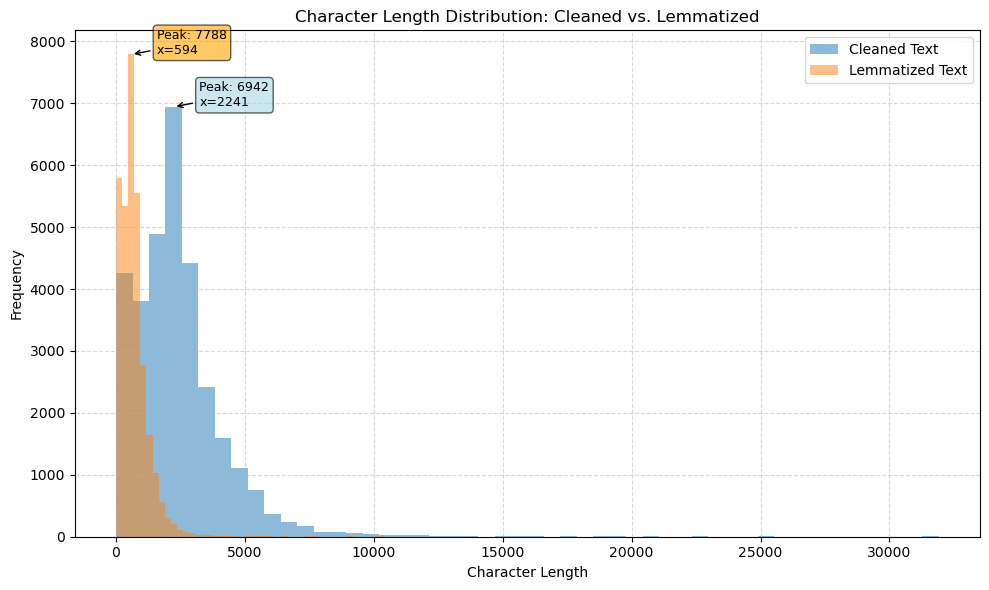

In [29]:
plt.figure(figsize=(10,6))

# Plot Cleaned Text length histogram
cleaned_freqs, cleaned_bins, _ = plt.hist(
    train_df['clean_text_length'], bins=50, alpha=0.5, label='Cleaned Text'
)
cleaned_peak_idx = np.argmax(cleaned_freqs)
cleaned_peak_x = (cleaned_bins[cleaned_peak_idx] + cleaned_bins[cleaned_peak_idx + 1]) / 2
cleaned_peak_y = cleaned_freqs[cleaned_peak_idx]
print(f"Cleaned Text Peak at x = {cleaned_peak_x}, frequency = {cleaned_peak_y}")

plt.annotate(
    f'Peak: {int(cleaned_peak_y)}\nx={int(cleaned_peak_x)}',
    xy=(cleaned_peak_x, cleaned_peak_y),
    xytext=(cleaned_peak_x + 1000, cleaned_peak_y + 10),
    arrowprops=dict(arrowstyle='->', lw=1),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", alpha=0.6)
)

# Plot Lemmatized Text length histogram
lemm_freqs, lemm_bins, _ = plt.hist(
    train_df['lemmas_length'], bins=50, alpha=0.5, label='Lemmatized Text'
)
lemm_peak_idx = np.argmax(lemm_freqs)
lemm_peak_x = (lemm_bins[lemm_peak_idx] + lemm_bins[lemm_peak_idx + 1]) / 2
lemm_peak_y = lemm_freqs[lemm_peak_idx]
print(f"Lemmatized Text Peak at x = {lemm_peak_x}, frequency = {lemm_peak_y}")

plt.annotate(
    f'Peak: {int(lemm_peak_y)}\nx={int(lemm_peak_x)}',
    xy=(lemm_peak_x, lemm_peak_y),
    xytext=(lemm_peak_x + 1000, lemm_peak_y + 10),
    arrowprops=dict(arrowstyle='->', lw=1),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="orange", alpha=0.6)
)

plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Character Length Distribution: Cleaned vs. Lemmatized')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [30]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_texts = train_df[train_df['news_label'] == 1]['lemmas'].dropna().tolist()

true_tokens = " ".join(true_texts).split()

true_frequency  = dict(Counter(true_tokens).most_common(40))

# Generate word cloud for True News
wc_true = WordCloud(width=800, height=400, background_color='white') \
             .generate_from_frequencies(true_frequency)

In [31]:
# Display the top 40 most common tokens in true news
true_frequency_df = pd.DataFrame({'Top 40 true words': true_frequency.keys(), 'Frequency': true_frequency.values()})
true_frequency_df

Top 40 true words  Frequency
0              trump      22018
1              state      14205
2         government      13795
3               year      13188
4             people      10871
5           election       9876
6            country       9578
7           official       9299
8           campaign       7845
9              group       7687
10              week       7547
11             party       7361
12            leader       7351
13         president       7260
14           percent       6645
15          security       6640
16               law       6488
17             month       6206
18              time       6034
19         statement       5997
20               tax       5749
21             court       5593
22    administration       5397
23            policy       5393
24              vote       5229
25              bill       5188
26               day       5183
27            member       4718
28              deal       4574
29            office       4559
30             force       4513
31             right       4481
32              plan       4411
33            police       4368
34            attack       4361
35           company       4296
36             issue       4285
37             house       4022
38             trade       3967
39              case       3903

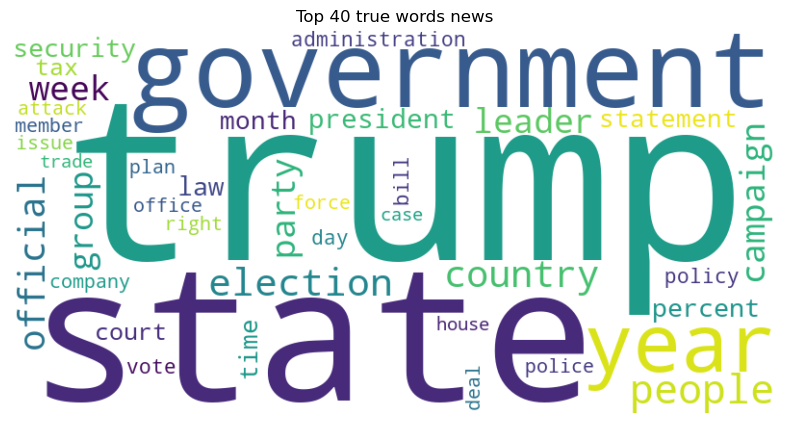

In [32]:
# Plot True News word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 true words news')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [33]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_texts = train_df[train_df['news_label'] == 0]['lemmas'].dropna().tolist()

fake_tokens = " ".join(fake_texts).split()

fake_frequency  = dict(Counter(fake_tokens).most_common(40))

# Generate word cloud for Fake News
wc_fake = WordCloud(width=800, height=400, background_color='white') \
             .generate_from_frequencies(fake_frequency)

In [34]:
# Display the top 40 most common tokens in fake news
fake_frequency_df = pd.DataFrame({'Top 40 fake words': fake_frequency.keys(), 'Frequency': fake_frequency.values()})
fake_frequency_df

Top 40 fake words  Frequency
0              trump      34415
1             people      18365
2               time      11173
3               year      10573
4          president      10137
5              image       9766
6              state       9010
7              woman       8226
8              video       8131
9               news       7748
10           country       7647
11          campaign       7601
12            medium       7518
13               man       6940
14               day       6609
15          election       6582
16               way       6555
17             thing       6457
18        government       6238
19               law       6045
20            police       5845
21             group       5547
22              fact       5084
23             story       4808
24             world       4749
25              life       4624
26             right       4479
27              week       4422
28            member       4396
29         candidate       4332
30            family       4230
31              case       4087
32            attack       4067
33             child       4027
34            report       4019
35             email       3781
36            office       3753
37          security       3748
38               gun       3741
39         supporter       3722

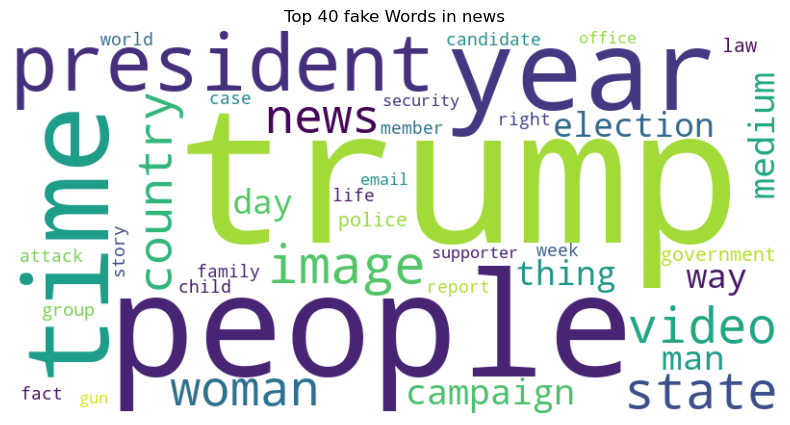

In [35]:
# Plot Fake News word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 fake Words in news')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [36]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=20):
    """
    Return the top_n most frequent n-grams for the given corpus.
    
    Parameters:
    - corpus: iterable of str, the text documents to analyze
    - ngram_range: tuple (min_n, max_n), the lower and upper boundary of the n-grams
    - top_n: int, the number of top n-grams to return
    
    Returns:
    - List of tuples: [(ngram, frequency), ...] sorted by frequency descending
    """
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    
    # Sum counts of each n-gram
    sums = X.sum(axis=0).A1  # .A1 to convert sparse matrix to flat array
    
    # Create list of (ngram, frequency)
    ngram_freq = list(zip(vectorizer.get_feature_names_out(), sums))
    
    # Return top_n sorted by frequency
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_n]


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [37]:
# Handle NaN values in the text data
train_df[['sanitized_text', 'lemmas']].isnull().sum()

sanitized_text    0
lemmas            0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [38]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

true_corpus = train_df[train_df['news_label'] == 1]['lemmas'].tolist()

unigrams = get_top_ngrams(true_corpus, ngram_range=(1,1), top_n=10)
unigram, frequency = zip(*unigrams)
unigrams_df = pd.DataFrame({'Unigram': unigram, 'Frequency': frequency})
unigrams_df

Unigram  Frequency
0       trump      22018
1       state      14205
2  government      13795
3        year      13188
4      people      10871
5    election       9876
6     country       9578
7    official       9299
8    campaign       7845
9       group       7687

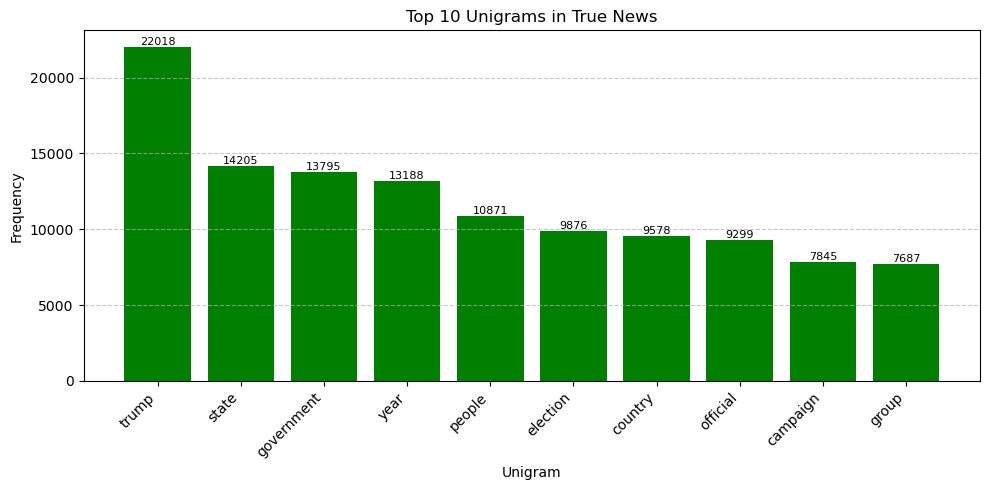

In [39]:
labels, counts = zip(*unigrams)

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, counts, color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in True News')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [40]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
bigrams  = get_top_ngrams(true_corpus, ngram_range=(2,2), top_n=10)

bigram, frequency = zip(*bigrams)
bigrams_df = pd.DataFrame({'Bigram': bigram, 'Frequency': frequency})
bigrams_df

Bigram  Frequency
0       news conference        955
1        trump campaign        941
2  trump administration        834
3        security force        721
4       request comment        718
5        climate change        706
6            tax reform        704
7       percent percent        700
8   intelligence agency        619
9  house representative        615

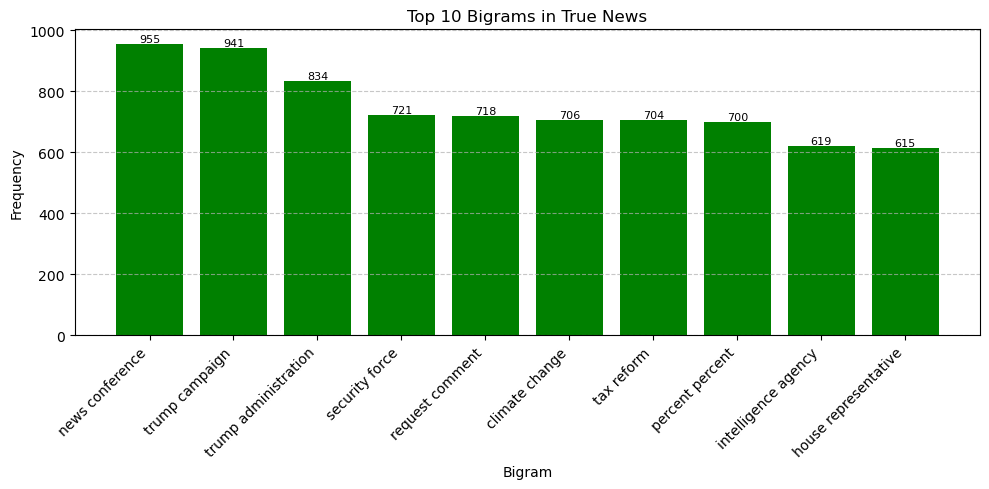

In [41]:
labels, counts = zip(*bigrams)

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, counts, color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in True News')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [42]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
trigrams = get_top_ngrams(true_corpus, ngram_range=(3,3), top_n=10)

trigram, frequency = zip(*trigrams)
trigrams_df = pd.DataFrame({'Trigram': trigram, 'Frequency': frequency})
trigrams_df

Trigram  Frequency
0     official condition anonymity        238
1                 tax rate percent        158
2        article staff involvement        122
3  involvement creation production        122
4       staff involvement creation        122
5        state department official        122
6                 use email server        114
7             rate percent percent        105
8            trump transition team         97
9          percent percent percent         94

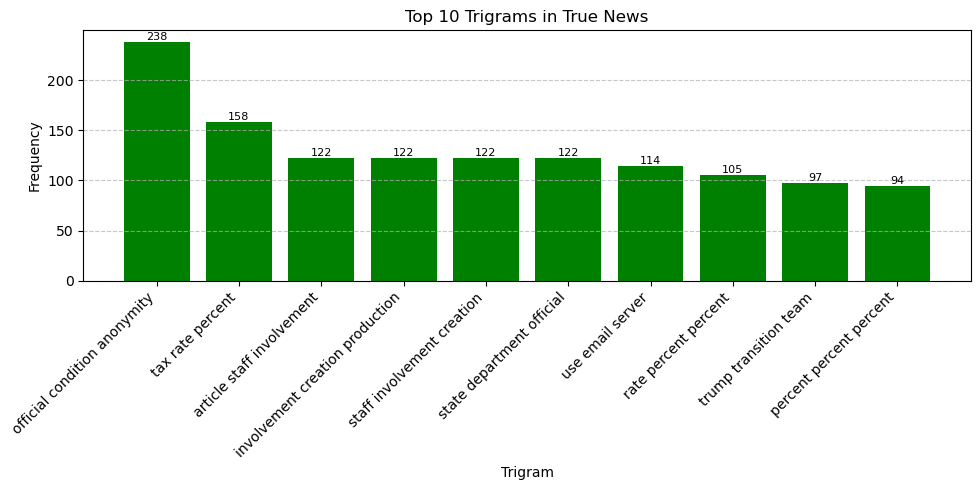

In [43]:
labels, counts = zip(*trigrams)

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, counts, color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in True News')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [44]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

sample_corpus = train_df[train_df['news_label'] == 0]['lemmas'].tolist()

unigrams = get_top_ngrams(sample_corpus, ngram_range=(1,1), top_n=10)
unigram, frequency = zip(*unigrams)
unigrams_df = pd.DataFrame({'Unigram': unigram, 'Frequency': frequency})
unigrams_df

Unigram  Frequency
0      trump      34415
1     people      18365
2       time      11173
3       year      10573
4  president      10137
5      image       9766
6      state       9010
7      woman       8226
8      video       8131
9       news       7748

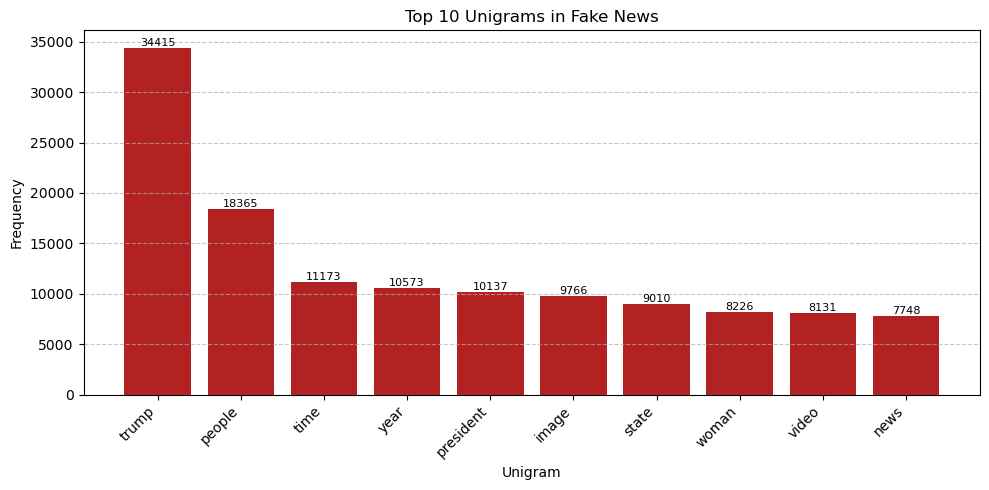

In [45]:
labels, counts = zip(*unigrams)

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, counts, color='firebrick')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in Fake News')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [46]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
bigrams  = get_top_ngrams(sample_corpus, ngram_range=(2,2), top_n=10)

bigram, frequency = zip(*bigrams)
bigrams_df = pd.DataFrame({'Bigram': bigram, 'Frequency': frequency})
bigrams_df

Bigram  Frequency
0        trump supporter       1431
1            image image       1294
2         police officer       1183
3           century wire       1162
4        law enforcement       1146
5         trump campaign       1119
6         screen capture        931
7           donald trump        919
8  trump realdonaldtrump        817
9      mainstream medium        747

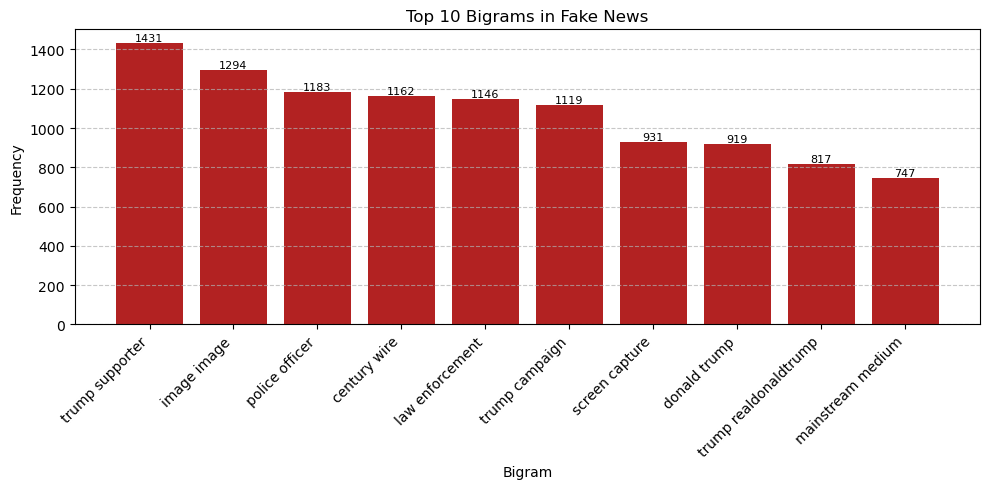

In [47]:
labels, counts = zip(*bigrams)

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, counts, color='firebrick')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in Fake News')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [48]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
trigrams = get_top_ngrams(sample_corpus, ngram_range=(3,3), top_n=10)

trigram, frequency = zip(*trigrams)
trigrams_df = pd.DataFrame({'Trigram': trigram, 'Frequency': frequency})
trigrams_df

Trigram  Frequency
0        news century wire        598
1     video screen capture        520
2       image video screen        480
3        image getty image        349
4     image screen capture        304
5         image chip image        179
6  law enforcement officer        173
7        century wire file        168
8   image video screenshot        164
9    broadcast boiler room        140

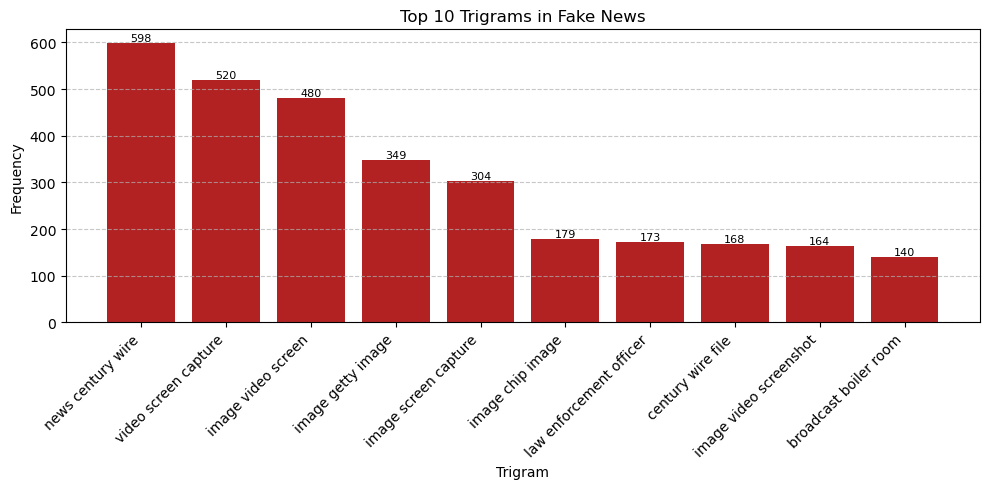

In [49]:
labels, counts = zip(*trigrams)

# Plot as a bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, counts, color='firebrick')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in Fake News')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

In [50]:
train_df.head()

news_label                                     sanitized_text  \
31810           0  conservative firebrand ann coulter destroys de...   
13931           1  turkey says trump told erdogan weapons wont be...   
3906            1  trump australias turnbull move to clear air af...   
18096           1  final tally in nz election strengthens labour ...   
32533           0  antitrump communications specialist for un arr...   

                                                  lemmas  clean_text_length  \
31810  firebrand ann coulter airline twitter seat peo...               2415   
13931  weapon instruction weapon ypg fighter governme...                859   
3906   trump air phone firstfacetoface meeting turnbu...               3519   
18096  tally election labour negotiation talk coaliti...               3264   
32533  communication specialist bank lunch employee m...               2079   

       lemmas_length  
31810            856  
13931            175  
3906             951  
18096            981  
32533            679


##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [52]:
# Add a new column to calculate the character length of cleaned news text
train_df['clean_text_length'] = train_df['sanitized_text'].str.len()
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmas_length'] = train_df['lemmas'].str.len()


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

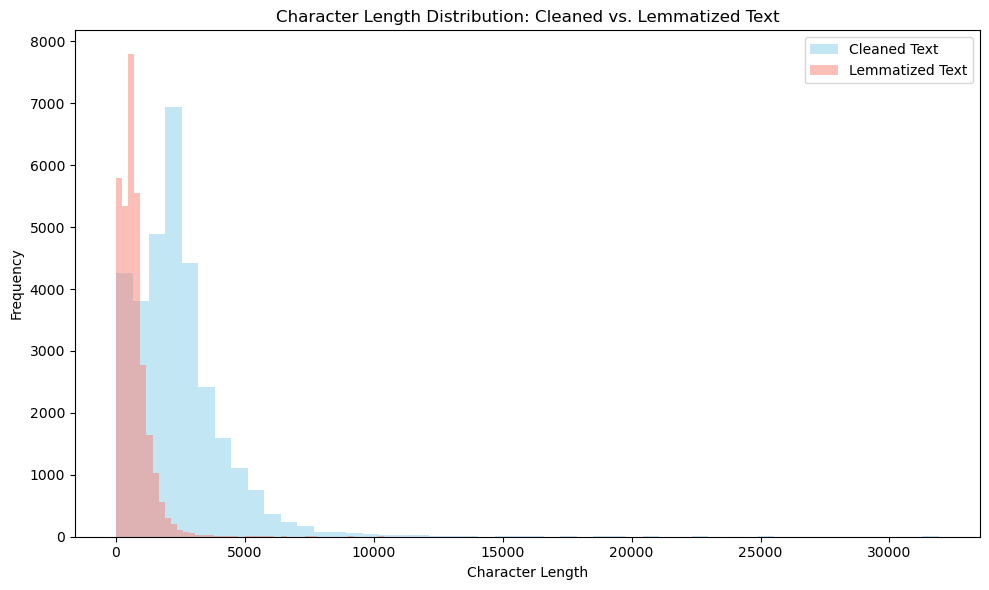

In [53]:
plt.figure(figsize=(10, 6))

# Histogram for cleaned text character lengths
cleaned_freqs, cleaned_bins = np.histogram(train_df['clean_text_length'], bins=50)
plt.hist(train_df['clean_text_length'], bins=50, alpha=0.5, label='Cleaned Text', color='skyblue')

# Histogram for lemmatized text character lengths
lemm_freqs, lemm_bins = np.histogram(train_df['lemmas_length'], bins=50)
plt.hist(train_df['lemmas_length'], bins=50, alpha=0.5, label='Lemmatized Text', color='salmon')

# Add axis labels and title
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Character Length Distribution: Cleaned vs. Lemmatized Text')
plt.legend()
plt.tight_layout()
plt.show()


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [55]:

import gensim.downloader as api

# Download the pre-trained model (will be cached locally after first run)
w2v_model = api.load("word2vec-google-news-300")

# Check model stats
print(f"Loaded {len(w2v_model.key_to_index):,} word vectors with dimension {w2v_model.vector_size}")


Loaded 3,000,000 word vectors with dimension 300


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [56]:
import numpy as np
from tqdm import tqdm

# Cache the vector size once
VECTOR_SIZE = w2v_model.vector_size

def mean_word2vec_vector(doc: str) -> np.ndarray:
    """
    Convert a space-tokenized document into the mean of its word vectors.
    Skips words not in the Word2Vec vocabulary.
    """
    tokens = doc.split()
    valid_vectors = [w2v_model[word] for word in tokens if word in w2v_model]
    return np.mean(valid_vectors, axis=0) if valid_vectors else np.zeros(VECTOR_SIZE)

# Apply transformation to training and validation datasets
X_train = np.vstack([mean_word2vec_vector(doc) for doc in tqdm(train_df['lemmas'], desc="Vectorizing train")])
X_val   = np.vstack([mean_word2vec_vector(doc) for doc in tqdm(val_df['lemmas'],   desc="Vectorizing val")])

# Extract target variables
y_train = train_df['news_label'].values
y_val   = val_df['news_label'].values

# Print shape information
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape:   {X_val.shape},   y_val shape:   {y_val.shape}")


Vectorizing val: 100%|████████████████| 13470/13470 [00:01<00:00, 9909.88it/s]

X_train shape: (31429, 300), y_train shape: (31429,)
X_val shape:   (13470, 300),   y_val shape:   (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    solver='lbfgs',
    n_jobs=-1
)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_val)

print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_lr))


Validation Accuracy: 0.9019
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7045
           1       0.89      0.90      0.90      6425

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [59]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_val, y_pred_lr)
print(f"Validation Accuracy: {acc:.4f}\n")
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_val, y_pred_lr))

Validation Accuracy: 0.9019

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7045
           1       0.89      0.90      0.90      6425

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [60]:
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [61]:

metrics = {
    "Accuracy": accuracy_score(y_val, y_pred_dt),
    "Precision": precision_score(y_val, y_pred_dt),
    "Recall": recall_score(y_val, y_pred_dt),
    "F1-Score": f1_score(y_val, y_pred_dt)
}

for metric, value in metrics.items():
    print(f"Decision Tree Validation {metric:<8}: {value:.4f}")

Decision Tree Validation Accuracy: 0.8193
Decision Tree Validation Precision: 0.8208
Decision Tree Validation Recall  : 0.7947
Decision Tree Validation F1-Score: 0.8075


In [62]:
# Classification Report
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7045
           1       0.82      0.79      0.81      6425

    accuracy                           0.82     13470
   macro avg       0.82      0.82      0.82     13470
weighted avg       0.82      0.82      0.82     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [63]:
rf_model = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1,
    max_features='sqrt',  
    # max_depth=20,       # optionally limit depth to prevent overfitting
    # warm_start=True     # if you plan to add more trees later incrementally
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [64]:
metrics = {
    "Accuracy": accuracy_score(y_val, y_pred_rf),
    "Precision": precision_score(y_val, y_pred_rf),
    "Recall": recall_score(y_val, y_pred_rf),
    "F1-Score": f1_score(y_val, y_pred_rf),
}

print("Random Forest Validation Metrics:")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name:10s}: {metric_value:.4f}")


Random Forest Validation Metrics:
Accuracy  : 0.9056
Precision : 0.9062
Recall    : 0.8948
F1-Score  : 0.9005


In [65]:
# Classification Report
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      7045
           1       0.91      0.89      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



#### Summarize the evaluation metrics for all three classifiers: Logistic Regression, Decision Tree, and Random Forest.

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


lr_accuracy  = accuracy_score(y_val, y_pred_lr)
lr_precision = precision_score(y_val, y_pred_lr)
lr_recall    = recall_score(y_val, y_pred_lr)
lr_f1        = f1_score(y_val, y_pred_lr)

dt_accuracy  = accuracy_score(y_val, y_pred_dt)
dt_precision = precision_score(y_val, y_pred_dt)
dt_recall    = recall_score(y_val, y_pred_dt)
dt_f1        = f1_score(y_val, y_pred_dt)

rf_accuracy  = accuracy_score(y_val, y_pred_rf)
rf_precision = precision_score(y_val, y_pred_rf)
rf_recall    = recall_score(y_val, y_pred_rf)
rf_f1        = f1_score(y_val, y_pred_rf)


In [67]:
performance_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [lr_accuracy, dt_accuracy, rf_accuracy],
    "Precision": [lr_precision, dt_precision, rf_precision],
    "Recall": [lr_recall, dt_recall, rf_recall],
    "F1-Score": [lr_f1, dt_f1, rf_f1]
}).set_index("Model")

performance_df = performance_df.round(4).applymap(lambda x: f"{x:.4f}")

print("="*53)
print(" "*4, "\033[1mSummary: Performance Metrics of All Models\033[0m")
print("="*53)
print(performance_df.to_string())


     Summary: Performance Metrics of All Models
                    Accuracy Precision  Recall F1-Score
Model                                                  
Logistic Regression   0.9019    0.8919  0.9038   0.8978
Decision Tree         0.8193    0.8208  0.7947   0.8075
Random Forest         0.9056    0.9062  0.8948   0.9005


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Exploratory Findings: Semantic Contrasts in News Authenticity
Unigram Patterns

In legitimate news coverage, the vocabulary is distinctly oriented towards governance and institutional matters—terms like trump (22,018), state (14,205), government (13,795), election (9,876), and campaign (7,845) dominate, underscoring a focus on political events and policy discussions.

Conversely, fabricated news, while also centering on trump (34,415), frequently co-occurs with words such as image (9,766), video (8,813), news (7,748), and medium (7,518). This pattern suggests a preference for sensational visuals and media references over substantive reporting.

Bigram Highlights

Authentic reporting is characterized by bigrams like news conference (955), trump campaign (941), climate change (706), and tax reform (704), indicating a structured approach to event coverage and legislative issues.

In contrast, synthetic articles often feature pairings such as trump supporter (1,431), image image (1,294), screen capture (931), and century wire (1,162). These combinations point to a narrative style that leans on promotional language, conspiracy framing, and frequent citation of specific media outlets or snippets.

Trigram Signatures

Genuine news articles commonly contain formal trigrams like official condition anonymity (238) and tax rate percent (158), reflecting the use of technical and bureaucratic expressions.

Fake content, on the other hand, is marked by repeated media-centric trigrams such as news century wire (598), video screen capture (520), and image video screen (480), highlighting a tendency to reuse sensational or aggregated visual content.

Classification Performance

By transforming these lemmatized noun phrases into averaged Word2Vec embeddings and applying various classifiers—including Logistic Regression, Decision Tree, and Random Forest—the Random Forest model emerged as the most effective. It achieved a validation accuracy of 90.6% and an F1-score of 0.901, slightly outperforming Logistic Regression (90.1% accuracy, F1-score 0.897) and Decision Tree models. The emphasis on F1-score is deliberate, as it balances precision (minimizing false positives among real news) and recall (maximizing detection of true news), both vital for robust misinformation detection.

Conclusion

To summarize, our approach—employing rigorous text normalization, noun-focused lemmatization, semantic embedding via Word2Vec, and ensemble machine learning—proves highly effective at distinguishing the policy-centric, formal language of authentic journalism from the visually-driven, sensational tone of fake news. These outcomes demonstrate that integrating frequency analysis with semantic representation offers a scalable and reliable solution for automated misinformation identification.



